In [1]:
import pandas as pd

# read data
reviews_df = pd.read_csv("full_merge.csv", encoding="UTF-8")
reviews_df["is_bad_review"] = reviews_df["SCORE"].apply(lambda x: 1 if x < 3 else 0)
# select only relevant columns
reviews_df = reviews_df[["EMPRESA","DESCRIPTION", "is_bad_review"]]
reviews_df

,EMPRESA,DESCRIPTION,is_bad_review
0,corteingles,Empresa que me ofrecio la primera oportunidad ...,0
1,corteingles,Empresa muy responsable con sus empleados nuev...,0
2,corteingles,"Buen ambiente de trabajo, trato al personal ex...",0
3,corteingles,Desde el minuto uno (proceso de seleccion y fo...,0
4,corteingles,Una gran empresa en todos los sectores,0
5,corteingles,Excelente,0
6,corteingles,Hhb,0
7,corteingles,Todo bien,0
8,corteingles,0000,0
9,corteingles,10,0


In [2]:
reviews_df = reviews_df[reviews_df['DESCRIPTION'].notnull()]

In [3]:
reviews_df.head()

,EMPRESA,DESCRIPTION,is_bad_review
0,corteingles,Empresa que me ofrecio la primera oportunidad ...,0
1,corteingles,Empresa muy responsable con sus empleados nuev...,0
2,corteingles,"Buen ambiente de trabajo, trato al personal ex...",0
3,corteingles,Desde el minuto uno (proceso de seleccion y fo...,0
4,corteingles,Una gran empresa en todos los sectores,0


In [4]:
#reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [5]:
from nltk.corpus import wordnet

In [6]:
# return the wordnet object value corresponding to the POS tag
#def get_wordnet_pos(pos_tag):
#    if pos_tag.startswith('J'):
#        return wordnet.ADJ
#    elif pos_tag.startswith('V'):
#        return wordnet.VERB
#    elif pos_tag.startswith('N'):
#        return wordnet.NOUN
#    elif pos_tag.startswith('R'):
#        return wordnet.ADV
#    else:
#        return wordnet.NOUN

In [7]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('spanish')
    text = [x for x in text if x not in stop]
   
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    #pos_tags = pos_tag(text, tagset='universal', lang='eng')
   
    # lemmatize text
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["DESCRIPTION"].apply(lambda x: clean_text(x))
#reviews_df

/anaconda3/envs/basic_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
reviews_df['totalwords'] = reviews_df['review_clean'].str.split().str.len()

/anaconda3/envs/basic_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
reviews_df = reviews_df.loc[reviews_df['totalwords'] >= 2]

In [10]:
#import sys
#print(sys.executable)

In [11]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review_clean"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


In [12]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review_clean"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review_clean"].apply(lambda x: len(x.split(" ")))

In [13]:
reviews_df.head()

,EMPRESA,DESCRIPTION,is_bad_review,review_clean,totalwords,neg,neu,pos,compound,nb_chars,nb_words
0,corteingles,Empresa que me ofrecio la primera oportunidad ...,0,empresa ofrecio primera oportunidad laboral tr...,9,0.0,1.000,0.000,0.000,77,9
1,corteingles,Empresa muy responsable con sus empleados nuev...,0,empresa responsable empleados nuevos trato est...,9,0.0,1.000,0.000,0.000,82,9
2,corteingles,"Buen ambiente de trabajo, trato al personal ex...",0,buen ambiente trabajo trato personal excepcion...,14,0.0,0.855,0.145,0.296,118,14
3,corteingles,Desde el minuto uno (proceso de seleccion y fo...,0,minuto proceso seleccion formacion finalizo co...,13,0.0,1.000,0.000,0.000,122,13
4,corteingles,Una gran empresa en todos los sectores,0,gran empresa sectores,3,0.0,1.000,0.000,0.000,21,3


In [14]:
#quitar ultimos caracteres raros
reviews_df["review_clean"] = reviews_df["review_clean"].apply(lambda x: 
x.replace("!", "").replace("?", "n").replace("Enter", "").replace("enter", "")
)


In [15]:
# create doc2vec vector columns
#from gensim.test.utils import common_texts
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
#model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
#doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
#doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
#reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [16]:
# add tf-idfs columns
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(min_df = 10)
#tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
#tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
#tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
#tfidf_df.index = reviews_df.index
#reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [17]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.922731
1    0.077269
Name: is_bad_review, dtype: float64

In [18]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud

show_wordcloud(reviews_df["review_clean"])

<Figure size 2000x2000 with 1 Axes>

In [19]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["EMPRESA","review_clean", "pos"]].head(10)


,EMPRESA,review_clean,pos
3802,carrefour,trabaja super comodo limpio companerismo excel...,0.581
9399,adecco,good and nice people to work with,0.533
11804,telepizza,lugar ideal inciados sector laboral primer tra...,0.531
8630,alcampo,gran empresa companeros super agradables,0.494
11358,cruzroja,trabaja super bien profesionales super amables...,0.494
2773,corteingles,empresa excelente trabaja super agusto,0.494
290,corteingles,super buen trato personal cliente,0.494
4425,carrefour,empresa super competente trato genial trabajad...,0.489
4151,carrefour,buen ambiente companeros mando superior,0.467
9413,adecco,trabajo oferta champions copa rey,0.459


In [20]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["EMPRESA","review_clean", "neg"]].head(10)


,EMPRESA,review_clean,neg
4487,carrefour,fatal tratan mal muchas horas,0.467
12775,telepizza,horrible llegaba cobrar euros mes,0.467
4091,carrefour,horrible tema horarios avisan ultima hora,0.412
12661,telepizza,cobra fatal euros mes metiendo horas,0.412
2205,corteingles,trabajo si malo problema administracion horrib...,0.389
13074,decathlon,good presence bad work hours,0.372
8371,alcampo,verdad trataron fatal problemas respecto horas...,0.368
12367,telepizza,trato horrible sueldo bajo demasiado trabajo c...,0.368
7337,carrefour,empresa trata fatal empleados solo numeros per...,0.368
6174,carrefour,solo falla grave penosa politica contratacion,0.342


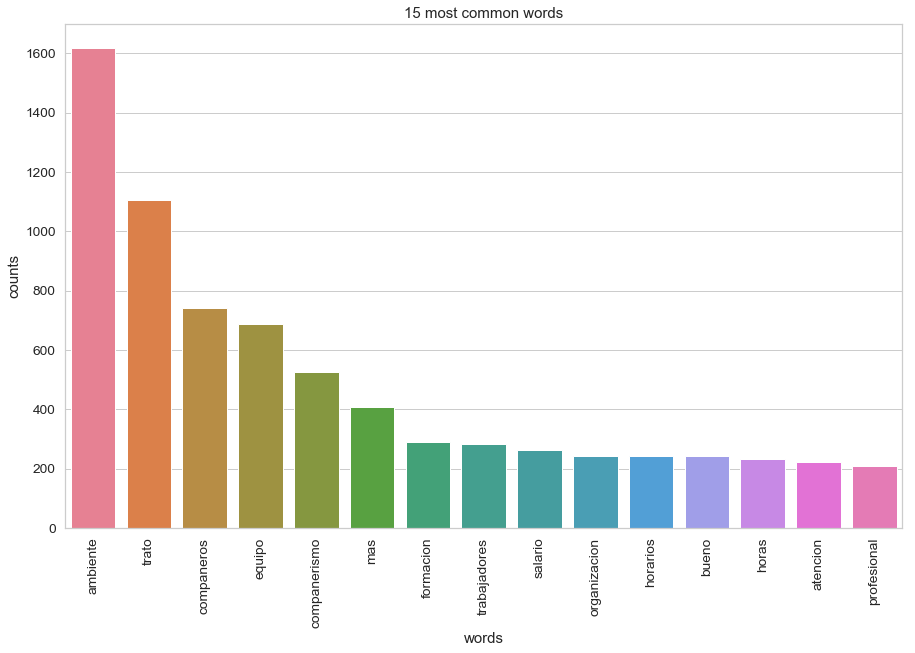

In [23]:

# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

lista_stop=['trabajo','buen','buena','buenas','seria','gran','trabajar','bien',
            'ma','dia','experiencia','empresa','buenos','corte','ingles','gusto','siempre'
           ,'excelente','positivo','positiva','trabaja','aprendi','sido','laboral','empleados','personal'
           ,'persona','cliente','puesto','roja','cruz','mal','alli']


# Helper function
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=lista_stop)
#print (count_vectorizer)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_df['review_clean'])
#print(count_data)

# Visualise the 10 most common words

plot_15_most_common_words(count_data, count_vectorizer)

In [22]:

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 1

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
profesional

Topic #1:
ambiente

Topic #2:
sueldo

Topic #3:
trabajadores

Topic #4:
companeros
